# Lecture 6: pandas (cont.)

## Revisit: DataFrame index, column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df1 = pd.DataFrame([purchase_1, purchase_2, purchase_3])
df1

,Cost,Item Purchased,Name
0,22.5,Dog Food,Chris
1,2.5,Kitty Litter,Kevyn
2,5.0,Bird Seed,Vinod


In [3]:
# when constructing a dataframe, you can specify the orders of columns
df2 = pd.DataFrame([purchase_1, purchase_2, purchase_3], columns=['Name', 'Item Purchased', 'Cost'])
df2

,Name,Item Purchased,Cost
0,Chris,Dog Food,22.5
1,Kevyn,Kitty Litter,2.5
2,Vinod,Bird Seed,5.0


In [4]:
df2.set_index('Name')

,Item Purchased,Cost
Name,,
Chris,Dog Food,22.5
Kevyn,Kitty Litter,2.5
Vinod,Bird Seed,5.0


In [5]:
df2

,Name,Item Purchased,Cost
0,Chris,Dog Food,22.5
1,Kevyn,Kitty Litter,2.5
2,Vinod,Bird Seed,5.0


In [6]:
df3 = df2.copy()
# inplace option changes on df3
df3.set_index('Name', inplace=True)
df3

,Item Purchased,Cost
Name,,
Chris,Dog Food,22.5
Kevyn,Kitty Litter,2.5
Vinod,Bird Seed,5.0


In [7]:
df3 = df2.copy()
# if you set drop option as False, column used for index is NOT dropped
df3.set_index('Name', inplace=True, drop=False)
df3

,Name,Item Purchased,Cost
Name,,,
Chris,Chris,Dog Food,22.5
Kevyn,Kevyn,Kitty Litter,2.5
Vinod,Vinod,Bird Seed,5.0


In [8]:
df2

,Name,Item Purchased,Cost
0,Chris,Dog Food,22.5
1,Kevyn,Kitty Litter,2.5
2,Vinod,Bird Seed,5.0


In [9]:
df2.index = ['First', 'Second', 'Third']
df2

,Name,Item Purchased,Cost
First,Chris,Dog Food,22.5
Second,Kevyn,Kitty Litter,2.5
Third,Vinod,Bird Seed,5.0


In [10]:
df2.columns = ['Name', 'Purchaed', 'Cost']
df2

,Name,Purchaed,Cost
First,Chris,Dog Food,22.5
Second,Kevyn,Kitty Litter,2.5
Third,Vinod,Bird Seed,5.0


In [11]:
df2.reset_index()

,index,Name,Purchaed,Cost
0,First,Chris,Dog Food,22.5
1,Second,Kevyn,Kitty Litter,2.5
2,Third,Vinod,Bird Seed,5.0


In [12]:
df2.reindex?

## Group by: split-apply-combine

By “group by” we are referring to a process involving one or more of the following steps
- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In the **'applying'** step, we often  process, we often take one of the following operations.
- **Aggregation**: computing a summary statistic (or statistics) about each group. Some examples:
  - Compute group sums or means
  - Compute group sizes / counts
- **Transformation**: perform some group-specific computations and return a like-indexed. Some examples:
  - Standardizing data (zscore) within group
  - Filling NAs within groups with a value derived from each group
- **Filtration**: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:
  - Discarding data that belongs to groups with only a few members
  - Filtering out data based on the group sum or mean
- Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories


Source: [Group By: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html)

In [13]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C', 'C'],
                   'data1': range(7),
                   'data2': rng.randint(0, 10, 7)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
6,C,6,3


In [14]:
grouped = df.groupby('key')
grouped

You can access each group using iteration or through `get_group()` method.

In [15]:
for key, group in grouped:
    print(f'{key}: shape={group.shape}')

A: shape=(2, 3)
B: shape=(2, 3)
C: shape=(3, 3)


In [16]:
grouped.get_group('A')

,key,data1,data2
0,A,0,5
3,A,3,3


### Aggregation

#### Built-in aggregation functions: `sum()`, `mean()`, `describe()`, ...

In [17]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.500000,4.0
B,2.500000,3.5
C,4.333333,5.0


In [18]:
df.groupby('key').sum()

,data1,data2
key,,
A,3,8
B,5,7
C,13,15


In [19]:
df.groupby('key').describe()

data1                                                data2                 \
    count      mean       std  min   25%  50%   75%  max count mean       std   
key                                                                             
A     2.0  1.500000  2.121320  0.0  0.75  1.5  2.25  3.0   2.0  4.0  1.414214   
B     2.0  2.500000  2.121320  1.0  1.75  2.5  3.25  4.0   2.0  3.5  4.949747   
C     3.0  4.333333  2.081666  2.0  3.50  5.0  5.50  6.0   3.0  5.0  3.464102   

                                
     min   25%  50%   75%  max  
key                             
A    3.0  3.50  4.0  4.50  5.0  
B    0.0  1.75  3.5  5.25  7.0  
C    3.0  3.00  3.0  6.00  9.0

In [20]:
df.groupby('key')['data1'].describe()

,count,mean,std,min,25%,50%,75%,max
key,,,,,,,,
A,2.0,1.500000,2.121320,0.0,0.75,1.5,2.25,3.0
B,2.0,2.500000,2.121320,1.0,1.75,2.5,3.25,4.0
C,3.0,4.333333,2.081666,2.0,3.50,5.0,5.50,6.0


#### `agg()` (a shorthand of `aggregate()`)

`agg()` provides more flexibility.

In [21]:
df.groupby('key').agg(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    5.0   6     3    3.0   9

You can apply different aggregation functions for different columns

In [22]:
df.groupby('key').agg({'data1': 'min', 'data2': ['min', 'max']})

data1 data2    
      min   min max
key                
A       0     3   5
B       1     0   7
C       2     3   9

### Transformation

`transform()` returns an object that is indexed the same as the one being grouped.

In [23]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
6,C,6,3


In [24]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.500000,4.0
B,2.500000,3.5
C,4.333333,5.0


In [25]:
transformed = df.groupby('key').transform(lambda x: x - x.mean())
transformed

,data1,data2
0,-1.500000,1.0
1,-1.500000,-3.5
2,-2.333333,-2.0
3,1.500000,-1.0
4,1.500000,3.5
5,0.666667,4.0
6,1.666667,-2.0


### Filteration

`filter()` takes a function as a parameter and returns a subset of the original object. The argument for `filter()` must be a function that can be applied to the group and that returns `True` or `False`.

In [26]:
df.groupby('key').filter(lambda x: len(x) > 2)

,key,data1,data2
2,C,2,3
5,C,5,9
6,C,6,3


In [27]:
df.groupby('key').filter(lambda x: x['data1'].sum() > 4)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9
6,C,6,3


Tip: When you cannot make an adequate argument for `filter()`, check if the function takes one group as an argument and returns a Boolean value.

In [28]:
df.groupby('key').get_group('A')

,key,data1,data2
0,A,0,5
3,A,3,3


In [29]:
lambda_check = lambda x: x['data1'].sum() > 4
lambda_check(df.groupby('key').get_group('A'))

False

### `apply()`

With `apply()`, you can use any function to the group results. The function should take DataFrame as an argument, and returns either a pandas object (e.g., DataFrame, Series) or a scalar. Return values of the function passed to `apply()` can be much more flexble than those passed to `filter()` or `transform()`.

In [30]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
6,C,6,3


In [31]:
df.groupby('key').apply(lambda x: x['data1'] / x['data2'].sum())

key   
A    0    0.000000
     3    0.375000
B    1    0.142857
     4    0.571429
C    2    0.133333
     5    0.333333
     6    0.400000
Name: data1, dtype: float64

In [32]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.133333,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.333333,9
6,C,0.400000,3


In [33]:
def add_norm_by_data2(x):
    x['norm_data1'] = x['data1'] / x['data2'].sum()
    return x

df.groupby('key').apply(add_norm_by_data2)

,key,data1,data2,norm_data1
0,A,0,5,0.000000
1,B,1,0,0.142857
2,C,2,3,0.133333
3,A,3,3,0.375000
4,B,4,7,0.571429
5,C,5,9,0.333333
6,C,6,3,0.400000


### Plotting

A         Axes(0.1,0.559091;0.363636x0.340909)
B    Axes(0.536364,0.559091;0.363636x0.340909)
C             Axes(0.1,0.15;0.363636x0.340909)
dtype: object

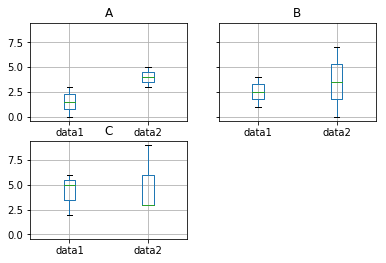

In [34]:
df.groupby('key').boxplot()

In [35]:
transformed = df['data1'].transform(lambda x: x- x.mean())
transformed

0   -3.0
1   -2.0
2   -1.0
3    0.0
4    1.0
5    2.0
6    3.0
Name: data1, dtype: float64

## Method cascading

The following style function invocations are callsed method cascading or method chaining. See [Method cascading](https://en.wikipedia.org/wiki/Method_cascading).

```
func1().func2().func3().func4(). ...
```

or

```
(func1().func2()
        .func3()
        .func4()
        ...
)
```

In the latter case, parentheses (i.e., ()) are used to wrap the whole expression since python takes only one line as an expression by default.

For the legitimacy of the above expression,
- The return value of `func1()` should have a method named `func2()`
- The return value of `func2()` should have a method named `func3()`
- $\cdots$

Therefore you need to think the type of return value. When it is not clear, use `type()` function to see the return type. And do not forget that the return value of one function may differ; for example, a return value of many functions is Series when it is one dimensional and DataFrame when it is two dimensional.

## Useful functions

### `where()`

In [36]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
titanic_df[titanic_df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The following style function invocations are callsed method cascading or method chaining. See [Method cascading](https://en.wikipedia.org/wiki/Method_cascading).

In [38]:
df.dropna?

In [39]:
titanic_df.where(titanic_df['Survived'] == 1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
titanic_df.where(titanic_df['Survived'] == 1).dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S
21,22.0,1.0,2.0,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S


In [41]:
(titanic_df.where(titanic_df['Survived'] == 1)
           .dropna()
           .head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
10,11.0,1.0,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.0,1.0,1.0,PP 9549,16.7000,G6,S
11,12.0,1.0,1.0,"Bonnell, Miss. Elizabeth",female,58.0,0.0,0.0,113783,26.5500,C103,S
21,22.0,1.0,2.0,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S


### `sort_values()`, `reindex()`

In [42]:
titanic_df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [43]:
titanic_df['Fare'].sort_values(ascending=False).head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: Fare, dtype: float64

In [44]:
titanic_df['Fare'].sort_values(ascending=False).index

Int64Index([679, 258, 737, 341, 438,  88,  27, 311, 742, 299,
            ...
            732, 466, 263, 674, 413, 277, 633, 302, 597, 271],
           dtype='int64', length=891)

In [45]:
# what would happen if we omit 'index' at the end of expression?
titanic_df.iloc[titanic_df['Fare'].sort_values(ascending=False).index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C


In [46]:
titanic_df.reindex(titanic_df['Fare'].sort_values(ascending=False).index)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C


### `nlargest()`

In [47]:
titanic_df.nlargest(5, 'Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


In [48]:
titanic_df.nlargest(5, ['Pclass', 'Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [49]:
titanic_df.nlargest(5, 'Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [50]:
titanic_df.nlargest(5, ['Age', 'Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [51]:
titanic_df.nlargest(1, ['Age', 'Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [52]:
titanic_df.nlargest?

### `dropna()`, `fillna()`

In [53]:
score_df = pd.DataFrame([{'Name': 'Bill', 'CS': 100, 'Bio': 100, 'Phy': 100},
                         {'Name': 'Steve', 'CS': 80, 'Phy': 50},
                         {'Name': 'Francis', 'Phy': 100, 'Bio': 95}
                        ],
                        columns=['Name', 'Phy', 'Bio', 'CS'])
score_df

,Name,Phy,Bio,CS
0,Bill,100,100.0,100.0
1,Steve,50,NaN,80.0
2,Francis,100,95.0,NaN


In [54]:
score_df.dropna()

,Name,Phy,Bio,CS
0,Bill,100,100.0,100.0


In [55]:
score_df.fillna(value=0)

,Name,Phy,Bio,CS
0,Bill,100,100.0,100.0
1,Steve,50,0.0,80.0
2,Francis,100,95.0,0.0


In [56]:
score_df.fillna?

## A little bit more complicated example

For this example, we use 2010 US census data. See [Description of 2010 Census data](https://www.census.gov/prod/cen2010/doc/sf1.pdf) for data description.

In [57]:
df = pd.read_csv('census.csv')
df.head(10)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [58]:
len(df) # total number of rows

3193

### Applying several functions to modify data more easily accessible

In [59]:
(df.where(df['SUMLEV']==50)
   .dropna()
   .set_index(['STNAME','CTYNAME'])
   .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})
)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME    CTYNAME                                                       
Alabama   Autauga County        50.0     3.0       6.0    1.0     1.0   
          Baldwin County        50.0     3.0       6.0    1.0     3.0   
          Barbour County        50.0     3.0       6.0    1.0     5.0   
          Bibb County           50.0     3.0       6.0    1.0     7.0   
          Blount County         50.0     3.0       6.0    1.0     9.0   
          Bullock County        50.0     3.0       6.0    1.0    11.0   
          Butler County         50.0     3.0       6.0    1.0    13.0   
          Calhoun County        50.0     3.0       6.0    1.0    15.0   
          Chambers County       50.0     3.0       6.0    1.0    17.0   
          Cherokee County       50.0     3.0       6.0    1.0    19.0   
          Chilton County        50.0     3.0       6.0    1.0    21.0   
          Choctaw County        50.0     3.0       6.0    1.0    23.0   
          Clarke County         50.0     3.0       6.0    1.0    25.0   
          Clay County           50.0     3.0       6.0    1.0    27.0   
          Cleburne County       50.0     3.0       6.0    1.0    29.0   
          Coffee County         50.0     3.0       6.0    1.0    31.0   
          Colbert County        50.0     3.0       6.0    1.0    33.0   
          Conecuh County        50.0     3.0       6.0    1.0    35.0   
          Coosa County          50.0     3.0       6.0    1.0    37.0   
          Covington County      50.0     3.0       6.0    1.0    39.0   
          Crenshaw County       50.0     3.0       6.0    1.0    41.0   
          Cullman County        50.0     3.0       6.0    1.0    43.0   
          Dale County           50.0     3.0       6.0    1.0    45.0   
          Dallas County         50.0     3.0       6.0    1.0    47.0   
          DeKalb County         50.0     3.0       6.0    1.0    49.0   
          Elmore County         50.0     3.0       6.0    1.0    51.0   
          Escambia County       50.0     3.0       6.0    1.0    53.0   
          Etowah County         50.0     3.0       6.0    1.0    55.0   
          Fayette County        50.0     3.0       6.0    1.0    57.0   
          Franklin County       50.0     3.0       6.0    1.0    59.0   
...                              ...     ...       ...    ...     ...   
Wisconsin Washburn County       50.0     2.0       3.0   55.0   129.0   
          Washington County     50.0     2.0       3.0   55.0   131.0   
          Waukesha County       50.0     2.0       3.0   55.0   133.0   
          Waupaca County        50.0     2.0       3.0   55.0   135.0   
          Waushara County       50.0     2.0       3.0   55.0   137.0   
          Winnebago County      50.0     2.0       3.0   55.0   139.0   
          Wood County           50.0     2.0       3.0   55.0   141.0   
Wyoming   Albany County         50.0     4.0       8.0   56.0     1.0   
          Big Horn County       50.0     4.0       8.0   56.0     3.0   
          Campbell County       50.0     4.0       8.0   56.0     5.0   
          Carbon County         50.0     4.0       8.0   56.0     7.0   
          Converse County       50.0     4.0       8.0   56.0     9.0   
          Crook County          50.0     4.0       8.0   56.0    11.0   
          Fremont County        50.0     4.0       8.0   56.0    13.0   
          Goshen County         50.0     4.0       8.0   56.0    15.0   
          Hot Springs County    50.0     4.0       8.0   56.0    17.0   
          Johnson County        50.0     4.0       8.0   56.0    19.0   
          Laramie County        50.0     4.0       8.0   56.0    21.0   
          Lincoln County        50.0     4.0       8.0   56.0    23.0   
          Natrona County        50.0     4.0       8.0   56.0    25.0   
          Niobrara County       50.0     4.0       8.0   56.0    27.0   
          Park County           50.0     4.0       8.0   56.0    29.0   
          Platt

In [60]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

df.apply(min_max, axis=1).head()

,max,min
0,4858979,4785161
1,55347,54660
2,203709,183193
3,27341,26489
4,22861,22512


In [61]:
df.apply?

In [62]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1).head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512


In [63]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

0       4858979
1         55347
2        203709
3         27341
4         22861
5         57776
6         10887
7         20944
8        118437
9         34153
10        26084
11        43943
12        13841
13        25767
14        13880
15        15072
16        51211
17        54514
18        13208
19        11758
20        38060
21        13963
22        82005
23        50358
24        43803
25        71387
26        81468
27        38309
28       104442
29        17231
         ...   
3163     133674
3164     396488
3165      52422
3166      24581
3167     169639
3168      74807
3169     586107
3170      37956
3171      12022
3172      49220
3173      15856
3174      14343
3175       7444
3176      41129
3177      13666
3178       4846
3179       8636
3180      97121
3181      18722
3182      82178
3183       2548
3184      29237
3185       8812
3186      30020
3187      10418
3188      45162
3189      23125
3190      21102
3191       8545
3192       7234
Length: 3193, dtype: int

In [64]:
df[df['STNAME'] == 'Alabama'].head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [65]:
df.where(df['STNAME'] == 'Alabama').dropna()['CENSUS2010POP'].head()

0    4779736.0
1      54571.0
2     182265.0
3      27457.0
4      22915.0
Name: CENSUS2010POP, dtype: float64

### Calculating the average population of counties by state

In [66]:
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 140580.470588
Counties in state Alaska have an average population of 47348.7333333
Counties in state Arizona have an average population of 799002.125
Counties in state Arkansas have an average population of 76734.6842105
Counties in state California have an average population of 1262845.9661
Counties in state Colorado have an average population of 154744.492308
Counties in state Connecticut have an average population of 794243.777778
Counties in state Delaware have an average population of 448967.0
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 552979.705882
Counties in state Georgia have an average population of 121095.6625
Counties in state Hawaii have an average population of 453433.666667
Counties in state Idaho have an average population of 69670.3111111
Counties in state Illinois have an average population of 249138.485437
Counties in stat

In [67]:
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 140580.470588
Counties in state Alaska have an average population of 47348.7333333
Counties in state Arizona have an average population of 799002.125
Counties in state Arkansas have an average population of 76734.6842105
Counties in state California have an average population of 1262845.9661
Counties in state Colorado have an average population of 154744.492308
Counties in state Connecticut have an average population of 794243.777778
Counties in state Delaware have an average population of 448967.0
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 552979.705882
Counties in state Georgia have an average population of 121095.6625
Counties in state Hawaii have an average population of 453433.666667
Counties in state Idaho have an average population of 69670.3111111
Counties in state Illinois have an average population of 249138.485437
Counties in stat

### Performance comparison of naive iteration v.s. group by

**Questions**
- Which method is better?
- What makes this difference?

In [68]:
%%timeit -n 10
# without print() to see the duration to execute this code
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])

757 ms ± 34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
%%timeit -n 10
# without print() to see the duration to execute this code
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])

14.5 ms ± 3.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Using mapping functions with group by

In [70]:
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [71]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1196 records in group 0 for processing.
There are 1154 records in group 1 for processing.
There are 843 records in group 2 for processing.


When you are NOT sure what is going on, check what groups are made by `groupby()`. Or you may print out one group.

In [72]:
df.groupby(fun).groups

{0: Index(['Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama',
        ...
        'Louisiana', 'Louisiana', 'Louisiana', 'Louisiana', 'Louisiana',
        'Louisiana', 'Louisiana', 'Louisiana', 'Louisiana', 'Louisiana'],
       dtype='object', name='STNAME', length=1196),
 1: Index(['Maine', 'Maine', 'Maine', 'Maine', 'Maine', 'Maine', 'Maine', 'Maine',
        'Maine', 'Maine',
        ...
        'Pennsylvania', 'Pennsylvania', 'Pennsylvania', 'Pennsylvania',
        'Pennsylvania', 'Pennsylvania', 'Pennsylvania', 'Pennsylvania',
        'Pennsylvania', 'Pennsylvania'],
       dtype='object', name='STNAME', length=1154),
 2: Index(['Rhode Island', 'Rhode Island', 'Rhode Island', 'Rhode Island',
        'Rhode Island', 'Rhode Island', 'South Carolina', 'South Carolina',
        'South Carolina', 'South Carolina',
        ...
        'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming',
        'Wyoming', 'W

In [73]:
df.groupby(fun).get_group(0)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,40,3,6,1,0,Alabama,4779736,4780127,4785161,4801108,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
Alabama,50,3,6,1,11,Bullock County,10914,10915,10887,10629,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
Alabama,50,3,6,1,13,Butler County,20947,20946,20944,20673,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
Alabama,50,3,6,1,15,Calhoun County,118572,118586,118437,117768,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406


### Another way of gettign aggregate values

In [74]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [75]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [76]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


In [77]:
(df.set_index('STNAME')
   .groupby(level=0).groups
)

{'Alabama': Index(['Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama',
        'Alabama'],
       dtype='object', name='STNAME'),
 'Alaska': Index(['Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska', 'Alaska',
        'Alaska', 'Alaska', 

In [78]:
(df.set_index('STNAME')
   .groupby(level=0)['CENSUS2010POP']
)

In [79]:
(df.set_index('STNAME')
   .groupby(level=0)['CENSUS2010POP']
   .agg({'avg': np.average, 'sum': np.sum})
)

/Users/chomg/.envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [80]:
# a new and recommended way
(df.set_index('STNAME')
   .groupby(level=0)['CENSUS2010POP']
   .agg([np.average, np.sum])
   .rename(columns={'average': 'avr', 'sum': 'sum'})
)

,avr,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [81]:
(df.set_index('STNAME')
   .groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
   .agg({'avg': np.average, 'sum': np.sum})
)

/Users/chomg/.envs/py3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

In [82]:
(df.set_index('STNAME')
   .groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
   .agg([np.average, np.sum])
   .rename(columns={'average': 'avr', 'sum': 'sum'})
)

POPESTIMATE2010           POPESTIMATE2011          
                                 avr       sum             avr       sum
STNAME                                                                  
Alabama                 71420.313433   4785161    71658.328358   4801108
Alaska                  24621.413793    714021    24921.379310    722720
Arizona                427213.866667   6408208   431248.800000   6468732
Arkansas                38965.253333   2922394    39180.506667   2938538
California             643691.017241  37334079   650000.586207  37700034
Colorado                78878.968750   5048254    79991.875000   5119480
Connecticut            447464.625000   3579717   448719.875000   3589759
Delaware               299930.333333    899791   302638.666667    907916
District of Columbia   605126.000000    605126   620472.000000    620472
Florida                281341.641791  18849890   285157.208955  19105533
Georgia                 61090.905660   9713454    61712.452830   9812280
Hawaii                 272796.000000   1363980   275645.400000   1378227
Idaho                   35704.227273   1570986    36003.045455   1584134
Illinois               125894.598039  12841249   126096.882353  12861882
Indiana                 70549.891304   6490590    70835.271739   6516845
Iowa                    30815.090909   3050694    30963.525253   3065389
Kansas                  27226.895238   2858824    27332.542857   2869917
Kentucky                36232.808333   4347937    36399.016667   4367882
Louisiana               71014.859375   4544951    71490.328125   4575381
Maine                   82980.937500   1327695    83016.062500   1328257
Maryland               241183.708333   5788409   243507.125000   5844171
Massachusetts          468931.142857   6565036   472271.214286   6611797
Michigan               119004.445783   9877369   118995.048193   9876589
Minnesota               61044.862069   5310903    61472.632184   5348119
Mississippi             36223.365854   2970316    36317.060976   2977999
Missouri                52139.582609   5996052    52265.973913   6010587
Montana                 17690.053571    990643    17816.892857    997746
Nebraska                19677.688172   1830025    19810.569892   1842383
Nevada                 159025.882353   2703440   159930.529412   2718819
New Hampshire          131670.800000   1316708   131834.400000   1318344
New Jersey             419232.428571   8803881   421092.095238   8842934
New Mexico              62567.909091   2064741    62976.545455   2078226
New York               312950.322581  19402920   314890.354839  19523202
North Carolina          95589.790000   9558979    96510.250000   9651025
North Dakota            12726.981132    674530    12930.679245    685326
Ohio                   131145.068182  11540766   131198.204545  11545442
Oklahoma                48825.922078   3759596    49176.961039   3786626
Oregon                 106610.333333   3837972   107458.583333   3868509
Pennsylvania           189731.552239  12712014   190226.895522  12745202
Rhode Island           210643.800000   1053219   210371.200000   1051856
South Carolina         100780.304348   4635894   101581.152174   4672733
South Dakota            12368.166667    816299    12489.227273    824289
Tennessee               66911.421053   6356585    67351.663158   6398408
Texas                   99387.255906  25244363   101001.826772  25654464
Utah                    95704.344828   2775426    97118.620690   2816440
Vermont                 44713.142857    625984    44763.357143    626687
Virginia                60344.263158   8025787    60983.330827   8110783
Washington             172898.974359   6743060   174954.589744   6823229
West Virginia           33713.181818   1854225    33726.327273   1854948
Wisconsin               79030.611111   5690204    79301.666667   5709720
Wyoming                 24544.173913    564516    24685.565217    567768

In [83]:
(df.set_index('STNAME')
   .groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
   .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum})
)

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


Note: This notebook is a modified version of pandas examples on coursera and 'Python Data Science Handbook'.